In [ ]:
# Importing libraries
import pandas as pd
pd.plotting.register_matplotlib_converters()

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np

# Helpful character encoding module
import charset_normalizer

print("Setup Complete")


Setup Complete


In [2]:
gdp_filepath="dataset/world_gdp_data.csv"
with open(gdp_filepath,'rb') as raw_data:
    result=charset_normalizer.detect(raw_data.read(10000))
print(result)

{'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}


In [3]:
gdp_data=pd.read_csv(gdp_filepath, encoding='Windows-1252')
print(gdp_data.head())
print(gdp_data.tail())
gdp_data.shape
gdp_data.info()
gdp_data.describe()

  country_name                      indicator_name  1980  1981  1982  1983  \
0  Afghanistan  Annual GDP growth (percent change)   NaN   NaN   NaN   NaN   
1      Albania  Annual GDP growth (percent change)   2.7   5.7   2.9   1.1   
2      Algeria  Annual GDP growth (percent change)  -5.4   3.0   6.4   5.4   
3      Andorra  Annual GDP growth (percent change)   NaN   NaN   NaN   NaN   
4       Angola  Annual GDP growth (percent change)   2.4  -4.4   0.0   4.2   

   1984  1985  1986  1987  ...  2015  2016  2017  2018  2019  2020  2021  \
0   NaN   NaN   NaN   NaN  ...   1.0   2.2   2.6   1.2   3.9  -2.4 -20.7   
1   2.0  -1.5   5.6  -0.8  ...   2.2   3.3   3.8   4.0   2.1  -3.3   8.9   
2   5.6   5.6  -0.2  -0.7  ...   3.7   3.2   1.4   1.2   1.0  -5.1   3.4   
3   NaN   NaN   NaN   NaN  ...   1.4   3.7   0.3   1.6   2.0 -11.2   8.3   
4   6.0   3.5   2.9   4.1  ...   0.9  -2.6  -0.2  -1.3  -0.7  -5.6   1.2   

   2022  2023  2024  
0   NaN   NaN   NaN  
1   4.8   3.6   3.3  
2   3.2 

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,141.000000,145.000000,147.000000,147.000000,147.000000,147.000000,148.000000,149.000000,150.000000,150.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,194.000000,194.000000,193.000000,191.000000,191.000000
mean,3.113475,2.677931,1.320408,1.832653,4.196599,3.125170,3.728378,3.718792,4.114000,3.396667,...,2.585641,2.817949,3.165128,3.209231,2.618462,-5.012371,5.367526,4.124870,3.331937,3.596335
std,5.450062,5.582481,6.421997,5.492974,6.771237,4.807982,4.787555,5.309481,6.040746,6.394864,...,5.067971,3.766720,4.121107,3.109068,3.792378,8.171780,6.236972,6.602691,6.385829,3.062101
min,-21.600000,-20.000000,-36.800000,-16.100000,-16.800000,-13.000000,-19.300000,-15.400000,-28.200000,-42.200000,...,-28.000000,-17.000000,-15.700000,-19.700000,-27.700000,-54.200000,-20.700000,-29.100000,-18.300000,-5.500000
25%,0.000000,0.100000,-1.100000,-1.350000,1.650000,0.850000,1.650000,1.500000,1.700000,1.150000,...,1.350000,1.500000,1.550000,1.700000,1.150000,-7.775000,2.675000,2.300000,1.400000,2.200000
50%,3.400000,2.900000,1.800000,2.400000,4.100000,3.500000,3.550000,3.600000,4.250000,3.800000,...,3.000000,3.000000,3.400000,3.200000,2.700000,-3.800000,5.050000,3.900000,2.800000,3.200000
75%,6.100000,5.700000,4.100000,4.650000,6.200000,5.600000,6.450000,5.900000,6.975000,5.700000,...,4.650000,4.750000,4.800000,4.800000,4.600000,-1.225000,7.350000,6.100000,4.400000,4.350000
max,18.800000,17.100000,23.200000,22.700000,44.500000,24.300000,18.600000,22.000000,23.400000,25.900000,...,24.500000,15.200000,32.500000,13.000000,13.800000,43.500000,41.700000,62.300000,74.400000,27.200000


In [4]:
#indicator is Annual GDP growth (percent change) for every country
#removing the non essential column,
gdp_data=gdp_data.drop(columns=['indicator_name'])
gdp_data.shape
gdp_data.head()

,country_name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.2,2.6,1.2,3.9,-2.4,-20.7,NaN,NaN,NaN
1,Albania,2.7,5.7,2.9,1.1,2.0,-1.5,5.6,-0.8,-1.4,...,2.2,3.3,3.8,4.0,2.1,-3.3,8.9,4.8,3.6,3.3
2,Algeria,-5.4,3.0,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,...,3.7,3.2,1.4,1.2,1.0,-5.1,3.4,3.2,3.8,3.1
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.4,3.7,0.3,1.6,2.0,-11.2,8.3,8.8,2.1,1.5
4,Angola,2.4,-4.4,0.0,4.2,6.0,3.5,2.9,4.1,6.1,...,0.9,-2.6,-0.2,-1.3,-0.7,-5.6,1.2,3.0,1.3,3.3


In [5]:
#gdp_data.rename_axis("year",axis='columns')
gdp_data.columns[1:]

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype='object')

<Figure size 2500x1000 with 0 Axes>

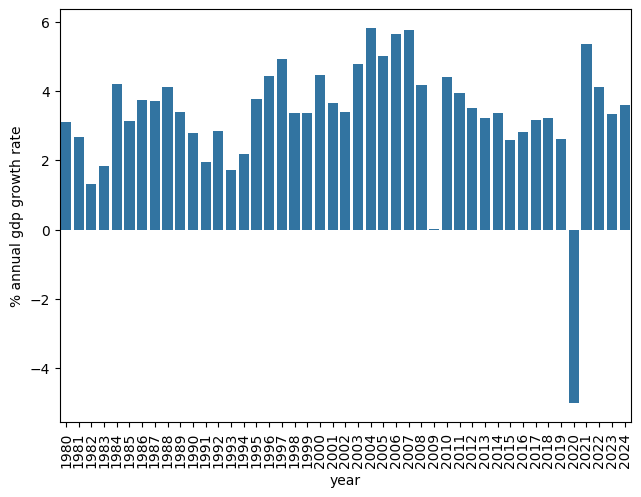

<Figure size 2500x1000 with 0 Axes>

In [6]:
#plotting graph of annual world gdp growth rate
mean_row=gdp_data.describe().loc['mean']
#rotating x-ticks for neatness
plt.xticks(rotation=90,ha="center")
plt.tight_layout()
sns.barplot(x=gdp_data.columns[1:],y=mean_row)
plt.xlabel("year")
plt.ylabel("% annual gdp growth rate")
plt.figure(figsize=(25,10))

In [7]:
#grouping countries
# lst=list(gdp_data.country_name)
# print(lst)
E5=['Australia','Canada','United States','United Kingdom','New Zealand']
A5=["China, People's Republic of",'Hong Kong SAR','Singapore','Japan','Korea, Republic of']
GCC=['Bahrain','United Arab Emirates','Oman','Kuwait','Qatar','Saudi Arabia']
BRICS=['Brazil','India','Russian Federation',"China, People's Republic of",'South Africa']
print("GDP data index", gdp_data.index)


GDP data index RangeIndex(start=0, stop=196, step=1)


In [8]:
# Check available country names in gdp_data
available_countries = gdp_data['country_name'].tolist()
print("Available countries:", available_countries)

Available countries: ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', "China, People's Republic of", 'Colombia', 'Comoros', 'Congo, Dem. Rep. of the', 'Congo, Republic of ', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', '

In [ ]:
def plot_gdp_growth(countries, title):
    try:
        data = gdp_data[gdp_data['country_name'].isin(countries)]
        new_data = data.set_index('country_name').T  # Transpose for plotting
        plt.figure(figsize=(25, 10))
        sns.lineplot(data=new_data)
        plt.xticks(rotation=90, ha="center")
        plt.xlabel("Year")
        plt.ylabel("% Annual GDP Growth Rate")
        plt.title(title)
        plt.tight_layout()
        plt.show()
    except KeyError as e:
        print(f"KeyError: {e}. Please check if all countries are present in the dataset.")


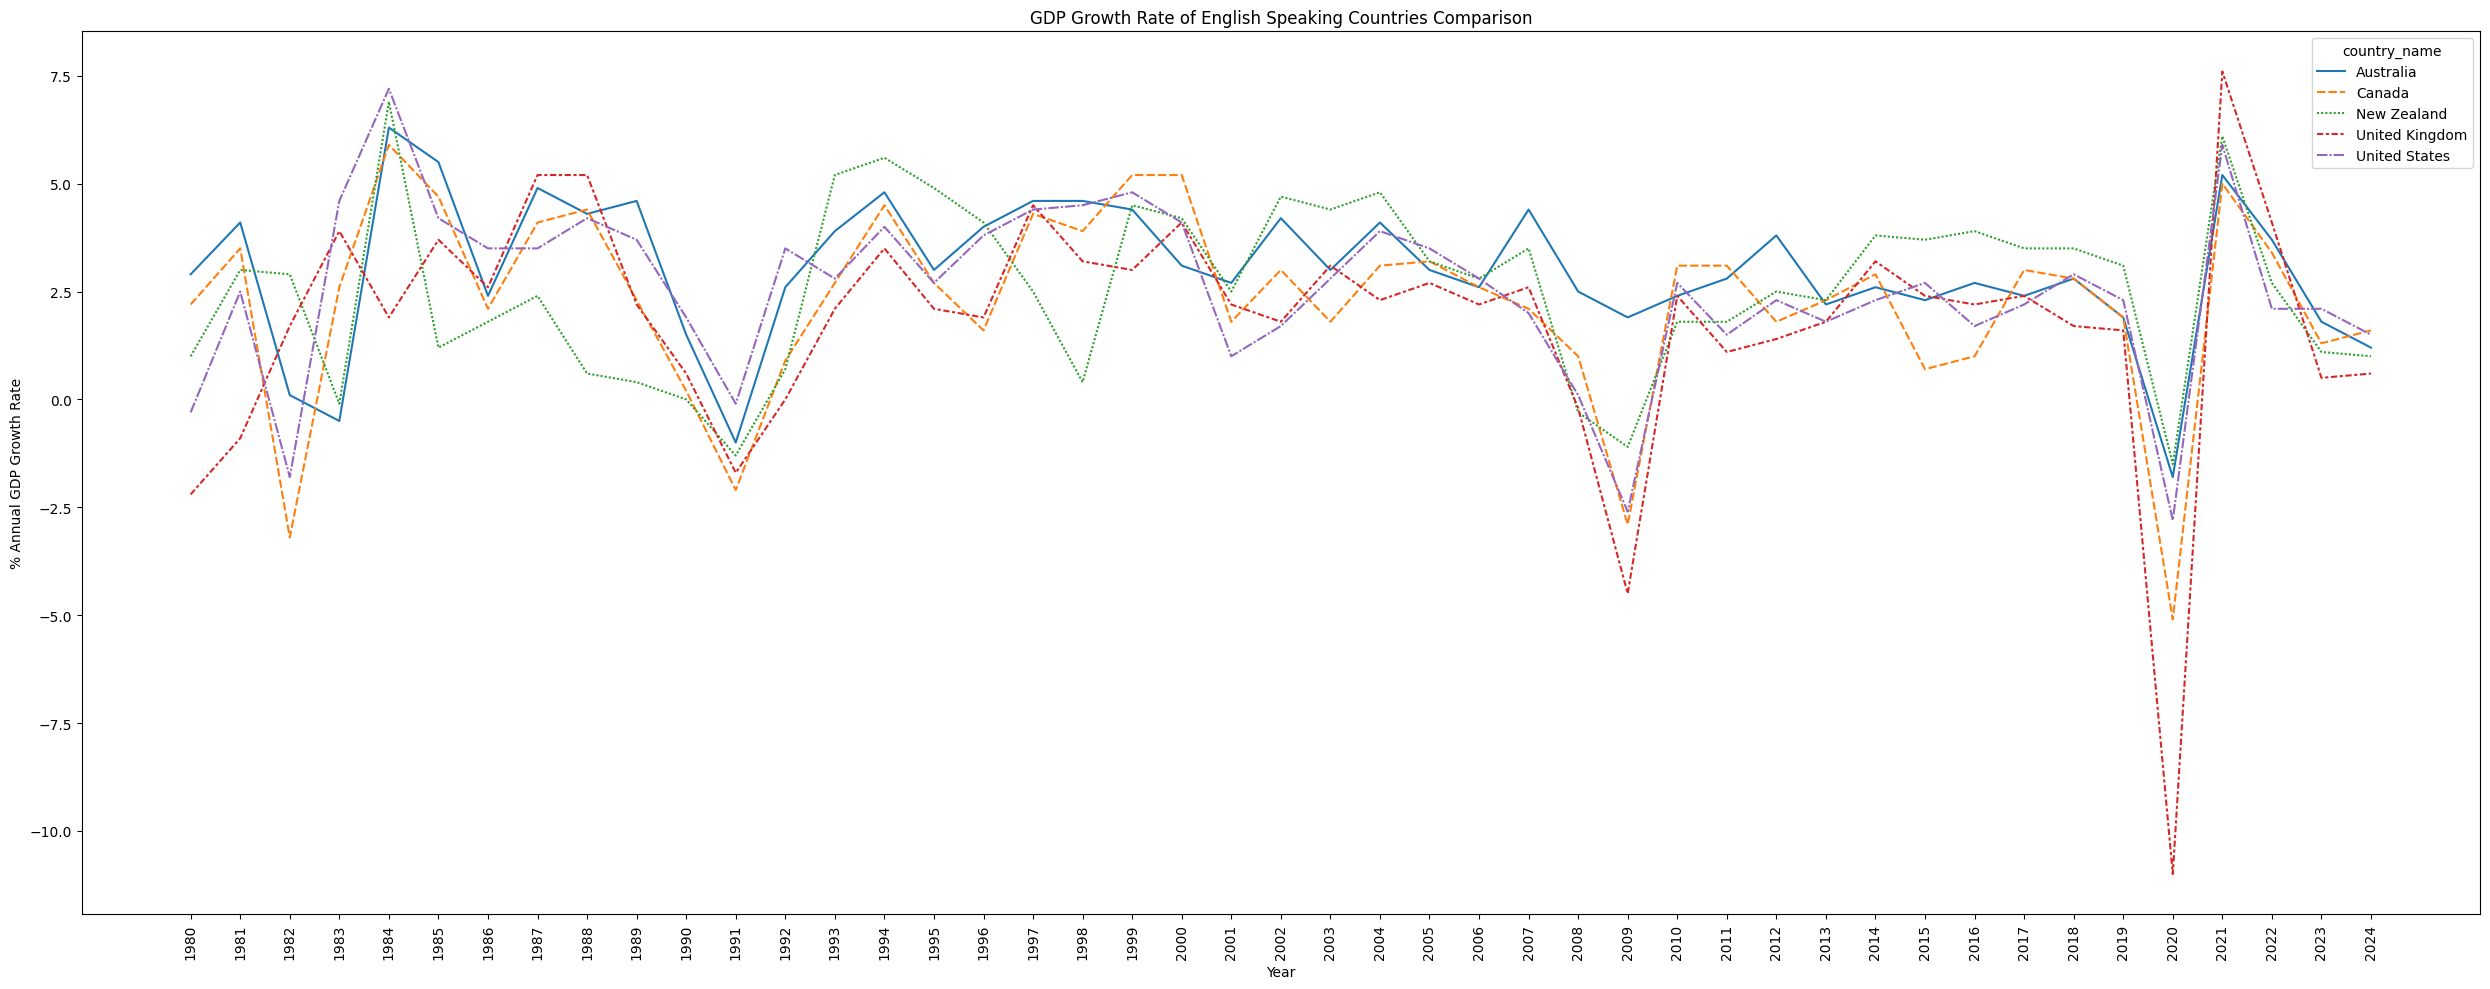

In [10]:
# Plotting GDP growth rates for different groups
plot_gdp_growth(E5, "GDP Growth Rate of English Speaking Countries Comparison")

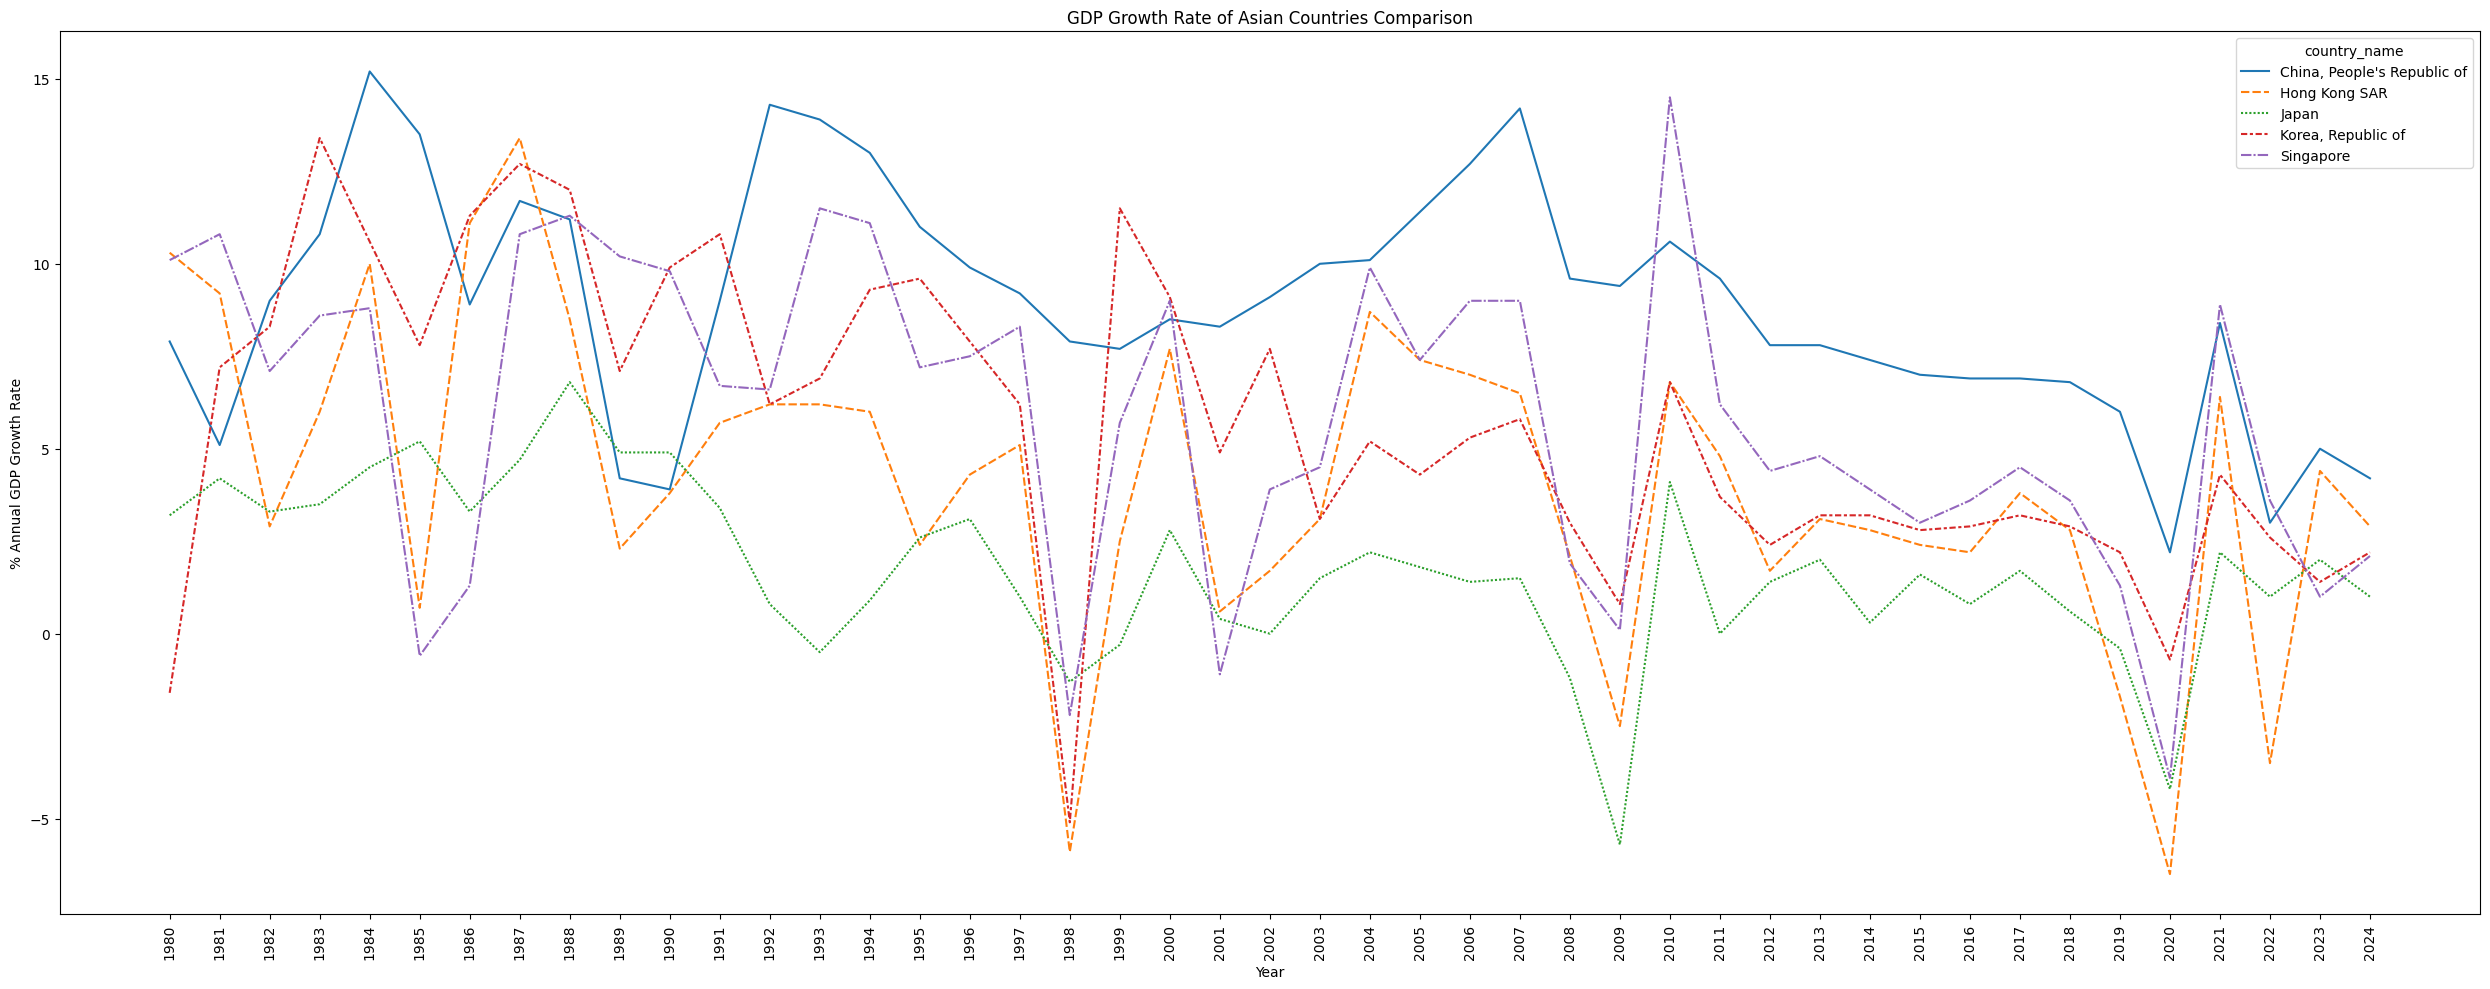

In [ ]:
plot_gdp_growth(A5, "GDP Growth Rate of Asian Countries Comparison")

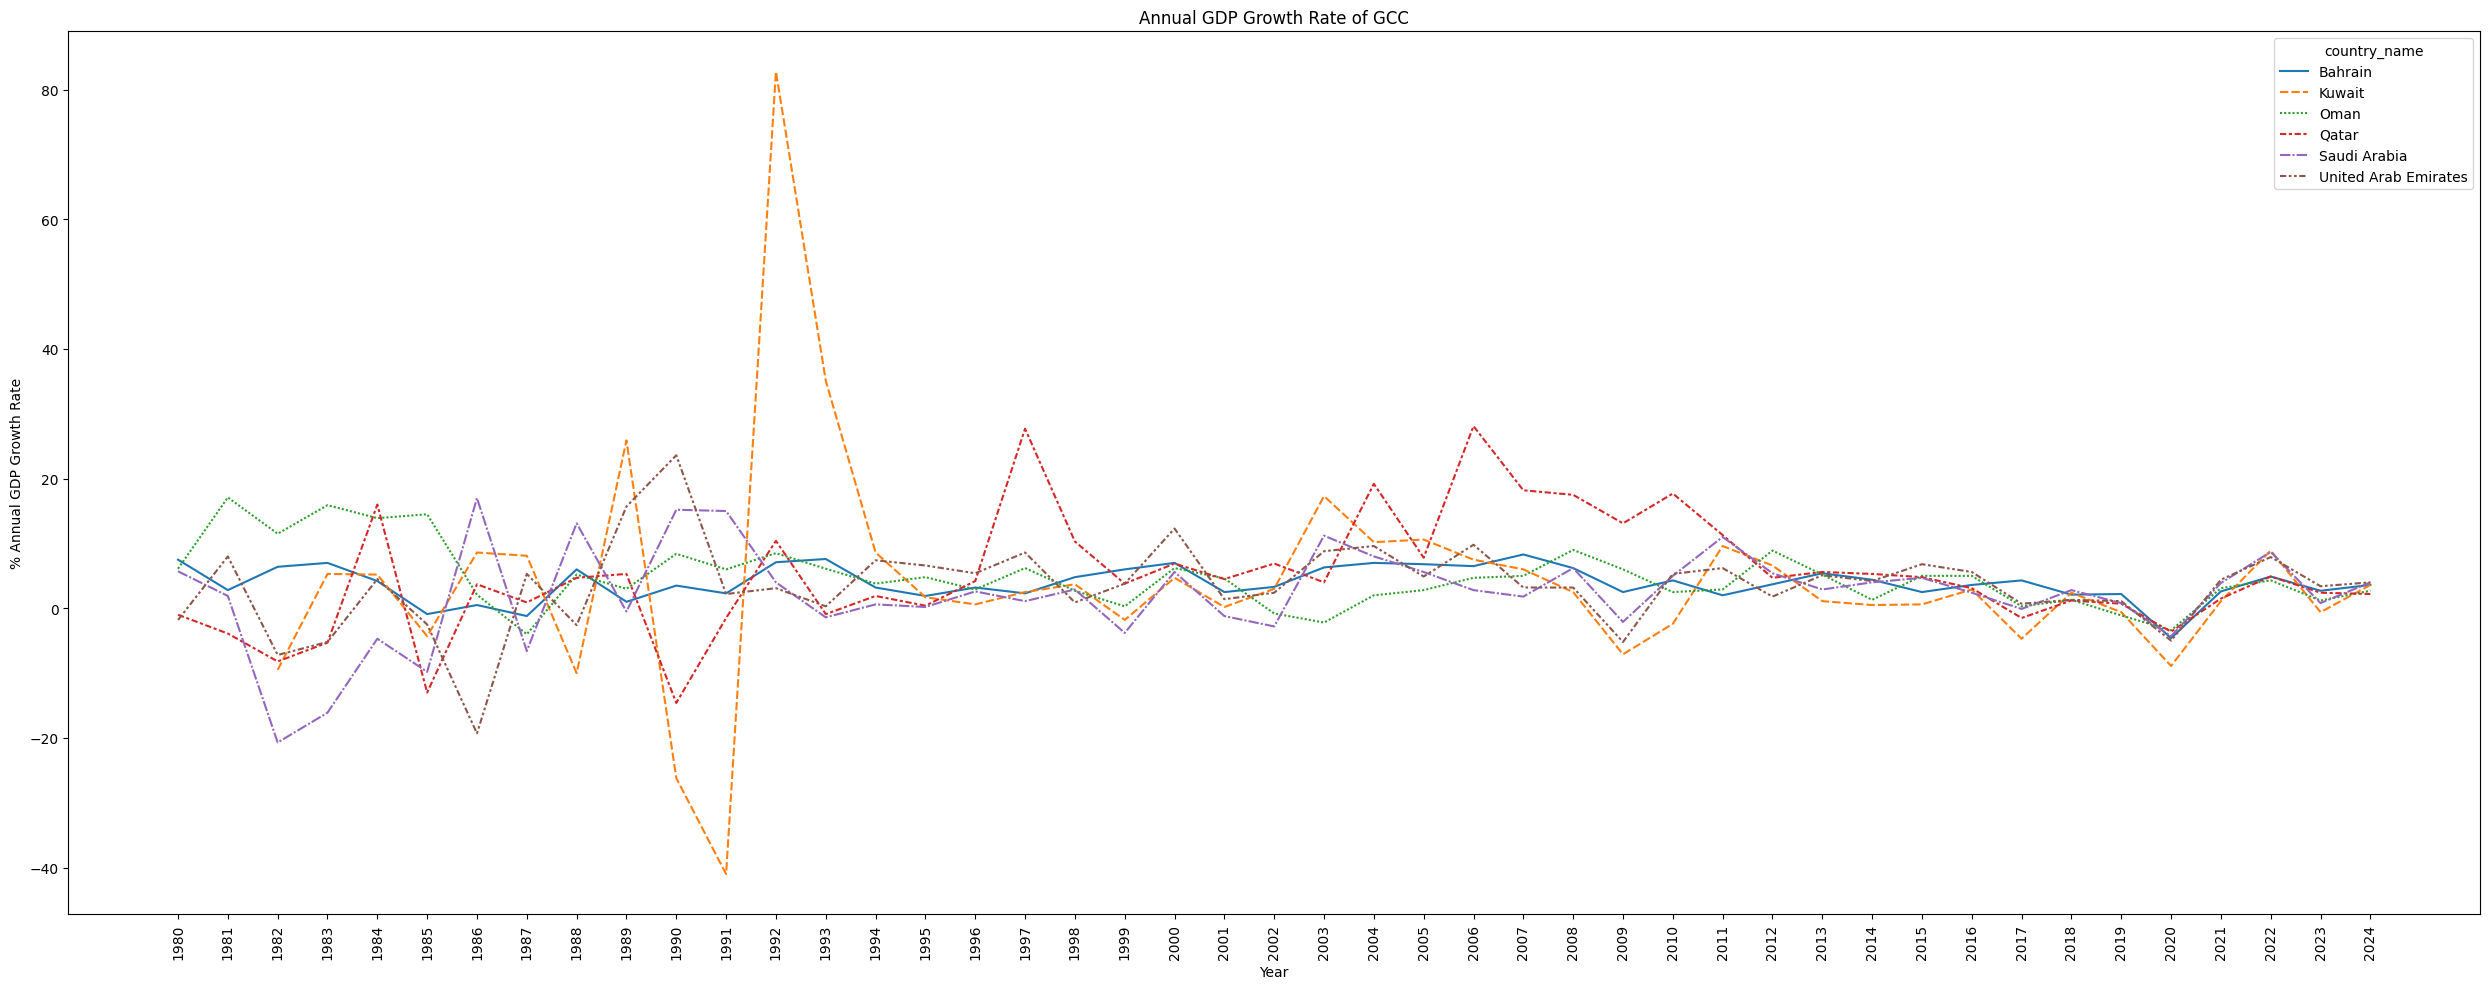

In [ ]:
plot_gdp_growth(GCC, "Annual GDP Growth Rate of GCC")

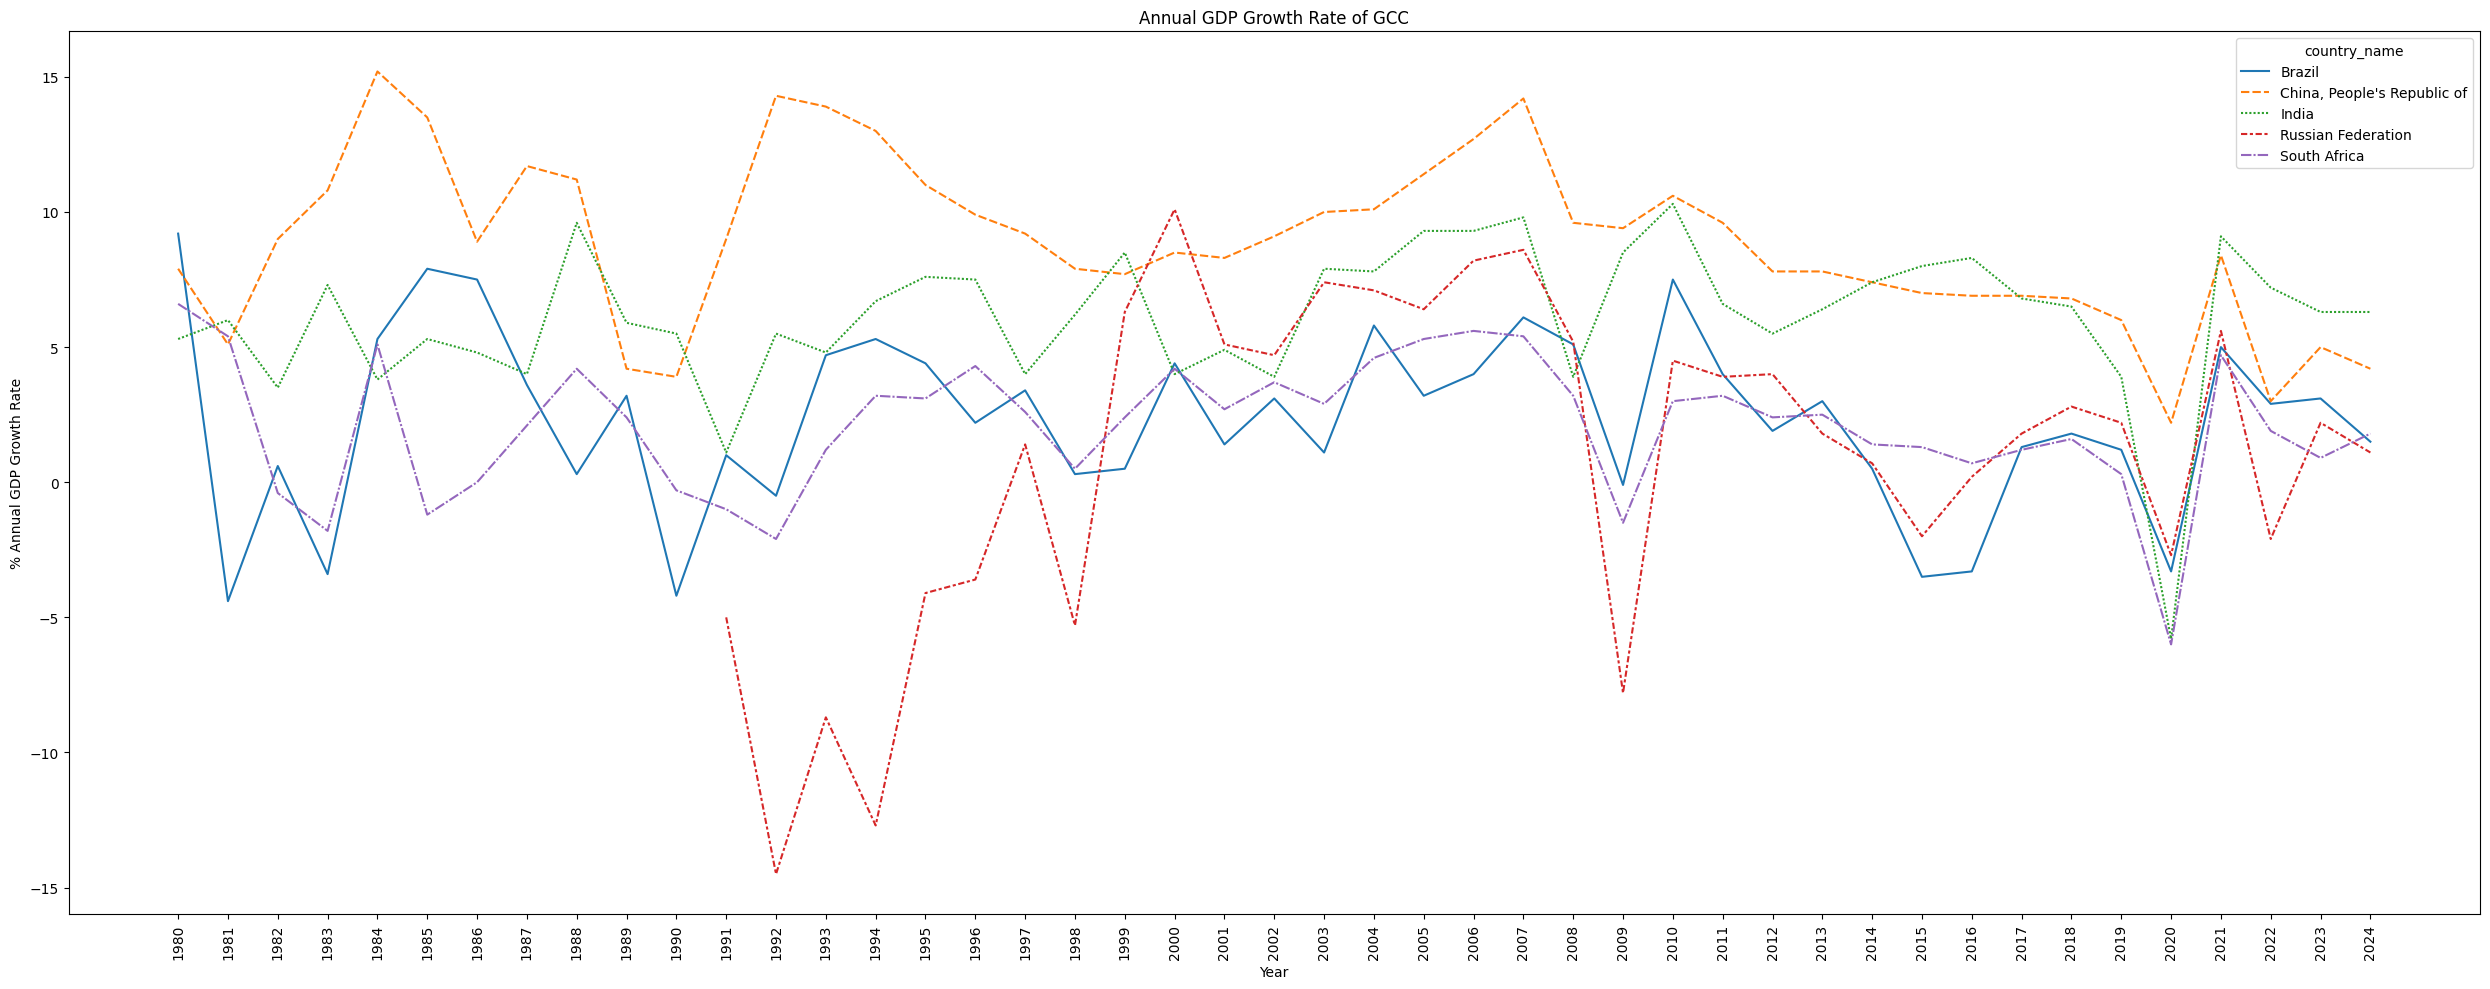

In [ ]:
plot_gdp_growth(BRICS, "Annual GDP Growth Rate of GCC")

In [ ]:
my_data = gdp_data.set_index('country_name').T.iloc[:-5]
df_parts = np.array_split(my_data, 4)
df_parts_index=[item.index for item in df_parts]
df_parts_index

c:\Users\Sumit Amit\.virtualenvs\gdp_growth-ii47gcJ2\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


[Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
        '1989'],
       dtype='object'),
 Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
        '1999'],
       dtype='object'),
 Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
        '2009'],
       dtype='object'),
 Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
        '2019'],
       dtype='object')]

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputed_data = pd.DataFrame(imputer.fit_transform(my_data), columns=my_data.columns)
imputed_data.sample(10)

country_name,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
16,5.4,9.1,3.8,1.6,11.2,6.6,5.5,5.2,1.3,4.0,...,3.8,5.6,1.7,2.3,-0.2,9.3,1.2,4.6,6.2,-0.5
28,3.9,7.5,2.4,-5.6,11.2,0.0,4.1,6.9,1.8,2.5,...,0.1,7.2,9.0,5.6,5.3,5.7,7.4,3.6,7.8,-16.3
38,1.2,4.0,1.2,1.6,-1.3,6.8,-2.6,5.2,2.4,2.8,...,2.9,0.2,5.9,2.9,-19.7,7.5,1.2,0.8,4.0,5.0
39,3.9,2.1,1.0,2.0,-0.7,4.3,-2.0,7.6,-2.3,1.9,...,2.3,0.7,6.0,3.2,-27.7,7.4,1.4,2.1,1.4,-6.3
0,5.4,2.7,-5.4,1.6,2.4,8.2,0.7,5.9,2.5,2.9,...,-0.3,6.0,5.9,5.5,-4.9,-3.5,5.8,3.9,3.9,-0.5
27,13.3,6.0,3.4,1.6,14.0,9.3,9.0,13.7,3.1,4.4,...,2.0,6.5,9.5,2.9,8.8,7.1,3.8,3.3,8.4,-3.4
9,5.4,9.8,4.8,1.6,0.0,5.3,-7.0,5.9,12.1,4.6,...,3.7,1.1,5.9,1.5,-13.9,7.8,5.8,3.9,-3.7,-0.5
12,5.4,-7.2,1.6,1.6,11.4,1.2,10.3,5.9,5.9,2.6,...,3.5,7.9,-11.1,2.6,6.1,8.7,5.8,8.2,2.1,-0.5
3,5.4,1.1,5.4,1.6,4.2,5.4,3.7,5.9,2.5,-0.5,...,4.6,-5.9,5.9,3.0,-9.9,7.1,5.8,3.9,-1.1,-0.5
4,5.4,2.0,5.6,1.6,6.0,10.2,2.0,5.9,2.5,6.3,...,7.2,-1.5,5.9,9.6,5.2,8.4,5.8,3.9,-1.7,-0.5


In [16]:
#plotting most & least volatile economies each decade:
#df_parts[3].describe()
std=[df.describe().loc['std'] for df in df_parts]
most_volatile=[df.max() for df in std]
#print(most_volatile)
names_most_volatile=[df.idxmax() for df in std]
#std[0].loc['Lebanon']
least_volatile=[df.min() for df in std]
names_least_volatile=[df.idxmin() for df in std]
#print(least_volatile)
print(names_most_volatile)
print(names_least_volatile)


['Lebanon', 'Equatorial Guinea', 'Equatorial Guinea', 'Libya']
['Bangladesh', 'Marshall Islands', 'Vietnam', 'Cambodia']


In [17]:
timeline=[]
start=1980
while start<2011:
    end=start+9
    timeline.append(f"{start}-{end}")
    start=end+1
    
timeline

['1980-1989', '1990-1999', '2000-2009', '2010-2019']

Text(0.5, 0, 'time period')

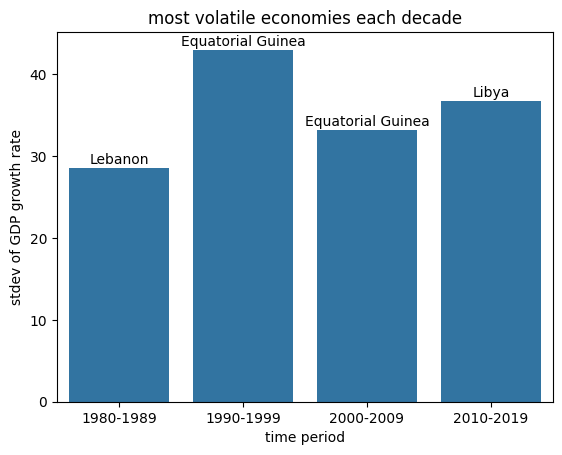

In [18]:
sns.barplot(x=timeline,y=most_volatile)
for i,vol in enumerate(most_volatile):
    plt.text(i,vol+0.5,names_most_volatile[i],ha='center')
plt.title("most volatile economies each decade")
plt.ylabel("stdev of GDP growth rate")
plt.xlabel('time period')

Text(0.5, 0, 'time period')

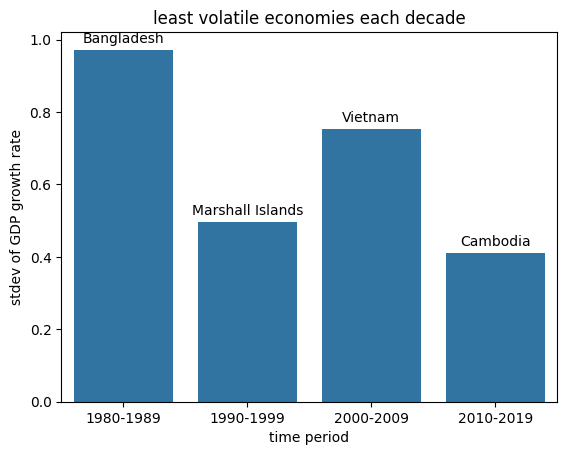

In [19]:
sns.barplot(x=timeline,y=least_volatile)
for i,vol in enumerate(least_volatile):
    plt.text(i,vol+0.02,names_least_volatile[i],ha='center')
plt.title("least volatile economies each decade")
plt.ylabel("stdev of GDP growth rate")
plt.xlabel('time period')